<a href="https://colab.research.google.com/github/sadaqatali1234/Deep-learning-assigments/blob/main/Car_Price_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
# importing all libarires 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
import tensorflow as tf
from keras import models,layers,optimizers,losses



In [80]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

***Data cleaning and analyzing***

In [81]:
#looking at data
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
#check for null
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [83]:
# data description
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [84]:
#complete info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# check for duplication
df.duplicated().any()

False

In [87]:
# spliting into input and output
x=df.iloc[:,:-1]
y=df.iloc[:,-1]



In [88]:
#dropping string data
x.drop(x.select_dtypes(include='object'),axis=1,inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 24.1 KB


In [89]:
# checking the shape of input and output
x.shape

(205, 15)

In [90]:
# checking the shape of input and output
y.shape

(205,)

Now split data for training and testing


In [91]:
x_train=x.sample(frac=0.7, random_state=1,axis=0)
y_train=y.sample(frac=0.7, random_state=1,axis=0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 78 to 175
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            144 non-null    int64  
 1   symboling         144 non-null    int64  
 2   wheelbase         144 non-null    float64
 3   carlength         144 non-null    float64
 4   carwidth          144 non-null    float64
 5   carheight         144 non-null    float64
 6   curbweight        144 non-null    int64  
 7   enginesize        144 non-null    int64  
 8   boreratio         144 non-null    float64
 9   stroke            144 non-null    float64
 10  compressionratio  144 non-null    float64
 11  horsepower        144 non-null    int64  
 12  peakrpm           144 non-null    int64  
 13  citympg           144 non-null    int64  
 14  highwaympg        144 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 18.0 KB


In [92]:
# spliting 
x_test=x.sample(frac=0.3, replace=True, random_state=1,axis=0)
y_test=y.sample(frac=0.3, replace=True, random_state=1,axis=0)

In [93]:
#shape of train and test
x_train.shape


(144, 15)

In [94]:
x_test.shape

(62, 15)

In [95]:
y_train.shape

(144,)

Normalising

In [96]:
x_train=np.asarray(x_train).astype("float32")
x_test=np.asarray(x_test).astype("float32")

In [97]:
mean = x_train.mean(axis=0)
x_train-= mean
std = x_train.std(axis=0)
x_train/= std
x_test-= mean
x_test/= std

In [99]:
# for labels 
y_mean = y_train.mean(axis=0)
y_train-= y_mean
y_std = y_train.std(axis=0)
y_train/= y_std
y_test-= y_mean
y_test/= y_std

In [100]:
# validation 
val_x=x_train[:20]
partial_x_train=x_train[80:]
val_y=y_train[:20]
partial_y_train=y_train[80:]

In [101]:
val_x.shape

(20, 15)

In [58]:
partial_x_train.shape

(64, 15)

In [102]:
inputshape=(x_train.shape[1],)
inputshape

(15,)

In [103]:
#model
mynet=models.Sequential()
mynet.add(layers.Dense(10,activation="relu" ,input_shape=inputshape))
mynet.add(layers.Dropout(0.2))
mynet.add(layers.Dense(8,activation="relu"))
#mynet.add(layers.Dropout(0.3))
mynet.add(layers.Dense(6,activation="relu"))
#mynet.add(layers.Dropout(0.3))
mynet.add(layers.Dense(1))

In [104]:
#letscompile
#mynet.compile(optimizer="rmsprop",loss="mse",metrics=["accuracy"])
mynet.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [105]:

mynet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                160       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [106]:
#train model
history=mynet.fit(partial_x_train, partial_y_train,epochs=90, batch_size=1, verbose=1,validation_data=(val_x,val_y))
#history=mynet.fit(partial_x_train, partial_y_train,epochs=85, batch_size=1, verbose=1,validation_data=(val_x,val_y))

Epoch 1/90
64/64 [==============================] - 1s 8ms/step - loss: 4.2031 - mae: 1.4806 - val_loss: 0.8811 - val_mae: 0.7431
Epoch 2/90
64/64 [==============================] - 0s 2ms/step - loss: 2.9451 - mae: 1.1161 - val_loss: 0.5091 - val_mae: 0.6045
Epoch 3/90
64/64 [==============================] - 0s 2ms/step - loss: 0.6613 - mae: 0.6454 - val_loss: 0.3232 - val_mae: 0.5046
Epoch 4/90
64/64 [==============================] - 0s 2ms/step - loss: 0.7000 - mae: 0.5339 - val_loss: 0.2511 - val_mae: 0.4366
Epoch 5/90
64/64 [==============================] - 0s 2ms/step - loss: 0.7933 - mae: 0.5856 - val_loss: 0.1978 - val_mae: 0.3828
Epoch 6/90
64/64 [==============================] - 0s 2ms/step - loss: 0.4649 - mae: 0.5118 - val_loss: 0.1632 - val_mae: 0.3530
Epoch 7/90
64/64 [==============================] - 0s 2ms/step - loss: 0.9289 - mae: 0.6602 - val_loss: 0.1333 - val_mae: 0.3087
Epoch 8/90
64/64 [==============================] - 0s 2ms/step - loss: 0.3135 - mae: 0.43

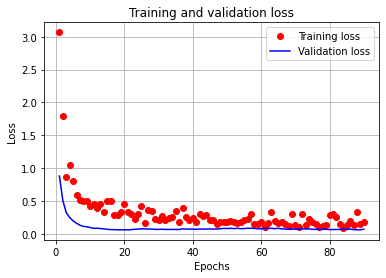

In [107]:
# graph 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"ro",label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [108]:
#evaluation
mynet.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1900 - mae: 0.3094


[0.1900094449520111, 0.3093529939651489]

In [110]:
#predictions 
result=mynet.predict(x_test)
result[4]

array([0.9691931], dtype=float32)

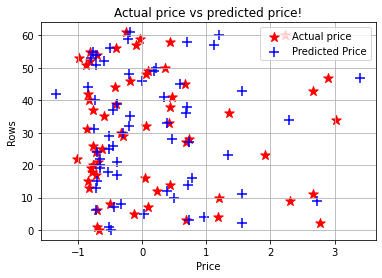

In [111]:
#graph of actual values and predicted values
y=result
y1=range(62)
x=y_test
plt.scatter(x, y1, label= "Actual price", color= "red", marker= "*", s=100)
plt.scatter(y, y1, label= "Predicted Price", color= "blue", marker= "+", s=100)
plt.xlabel('Price')
plt.ylabel('Rows')
plt.title('Actual price vs predicted price!')
plt.legend()
plt.grid()
plt.show()